# tSNE Clustering, Wine Data

Since tSNE was executed in python for class, I have done the same. The other clustering parts to Q5 are in Rstudio.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px  # for interative visualizations

Similar to the other clustering methods, I have opened the file and changed color into numeric. 0 is white and 1 is red.

In [2]:
#read the data and change white/red to numeric
df = pd.read_csv('wine.csv')
df['color'] = df['color'].map({'red': 1, 'white': 0})
df[:1]

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4               0.7          0.0             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  color  
0      9.4        5      1

I have dropped any NaN values as I was getting errors later on in the code:

In [3]:
#df.dropna()

The variables I am going to standardize and fit to the tSNE model are the 11 chemical elements:

In [4]:
# define the variables to be standardized
vars_to_standardize = ['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates']

# create a scaler object
scaler = StandardScaler()

# fit and transform the data
df[vars_to_standardize] = scaler.fit_transform(df[vars_to_standardize])

In [5]:
# specify the hyperparameters. For example, we can start with a perplexity of 30 
# and a learning rate (also called epsilon) of 200. These are common starting values for tSNE.
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)

# run t-SNE on the standardized data
tsne_results = tsne.fit_transform(df[vars_to_standardize])


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.012s...
[t-SNE] Computed neighbors for 6497 samples in 0.844s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.640440
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.446274
[t-SNE] KL divergence after 1000 iterations: 1.429492


Next, I have created a scatterplot. However, as you can see, this is not super helpful as we do not know what the points are! As a result, I will convert the t-SNE results to a DataFrame after this plot.

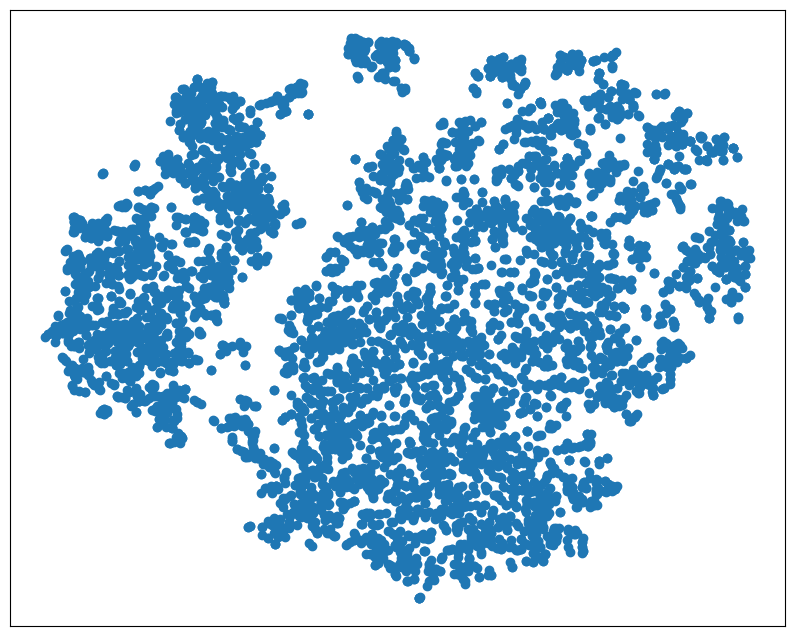

In [6]:
# create a scatter plot
plt.figure(figsize=(10,8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.show()

The first edition of the new scatterplot has the **quality** values when you hover over the points:

In [7]:

# convert the t-SNE results to a DataFrame
tsne_df = pd.DataFrame(data = tsne_results, columns = ['Dim1', 'Dim2'])

# add the quality names to this DataFrame
tsne_df['quality'] = df['quality'].values

# create an interactive plot
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', hover_data=['quality'])
fig.show()


The first edition of the new scatterplot has the **color** values when you hover over the points:

In [8]:

# convert the t-SNE results to a DataFrame
tsne_df = pd.DataFrame(data = tsne_results, columns = ['Dim1', 'Dim2'])

# add the quality names to this DataFrame
tsne_df['color'] = df['color'].values

# create an interactive plot
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', hover_data=['color'])
fig.show()


Again, quality is hard to distinguish as there are all different types of qualities mixed together. For example, looking at the LHS of the scatterplot, and the left cluster, the qualities range from 4-8. However, in the second scatterplot, we see that all of these points are red wines. The RHS, where the big cluster is, all of these wines are a mix of qualities, but white wines! From earlier EDA, I know that there is a heavy imbalance of white wines to red wines, so it makes sense that the white cluster is far larger!

### Using colors for the scatterplots:

In [10]:
# Define 'Lowest', 'Highest' or 'Other' category for wine quality
df['quality_category'] = 'Other'
df.loc[df['quality'] <= 3, 'quality_category'] = 'Lowest'
df.loc[df['quality'].isin([8, 9]), 'quality_category'] = 'Highest'

# Add the quality categories to the t-SNE DataFrame
tsne_df['quality'] = df['quality'].values

# Create an interactive plot using Plotly for categorized data based on 'quality'
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', color='quality', hover_data=['quality'])
fig.show()

In [15]:
# Create an interactive plot using Plotly for categorized data based on 'quality'
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', color='color', hover_data=['color'])
fig.show()

Note: these scatterplots are the same as before, but we can now see more clearly the separation by wine color with the yellow acting as white wine, and blue as red wine. As suspected, the quality is a lot less clear.

Finally, I have used different perplexity values for different colors. I have not repeated this for quality as there does not seem to be an obvious pattern emerging, so I think, no matter the level of perplexity, I am not going to get a clear pattern.

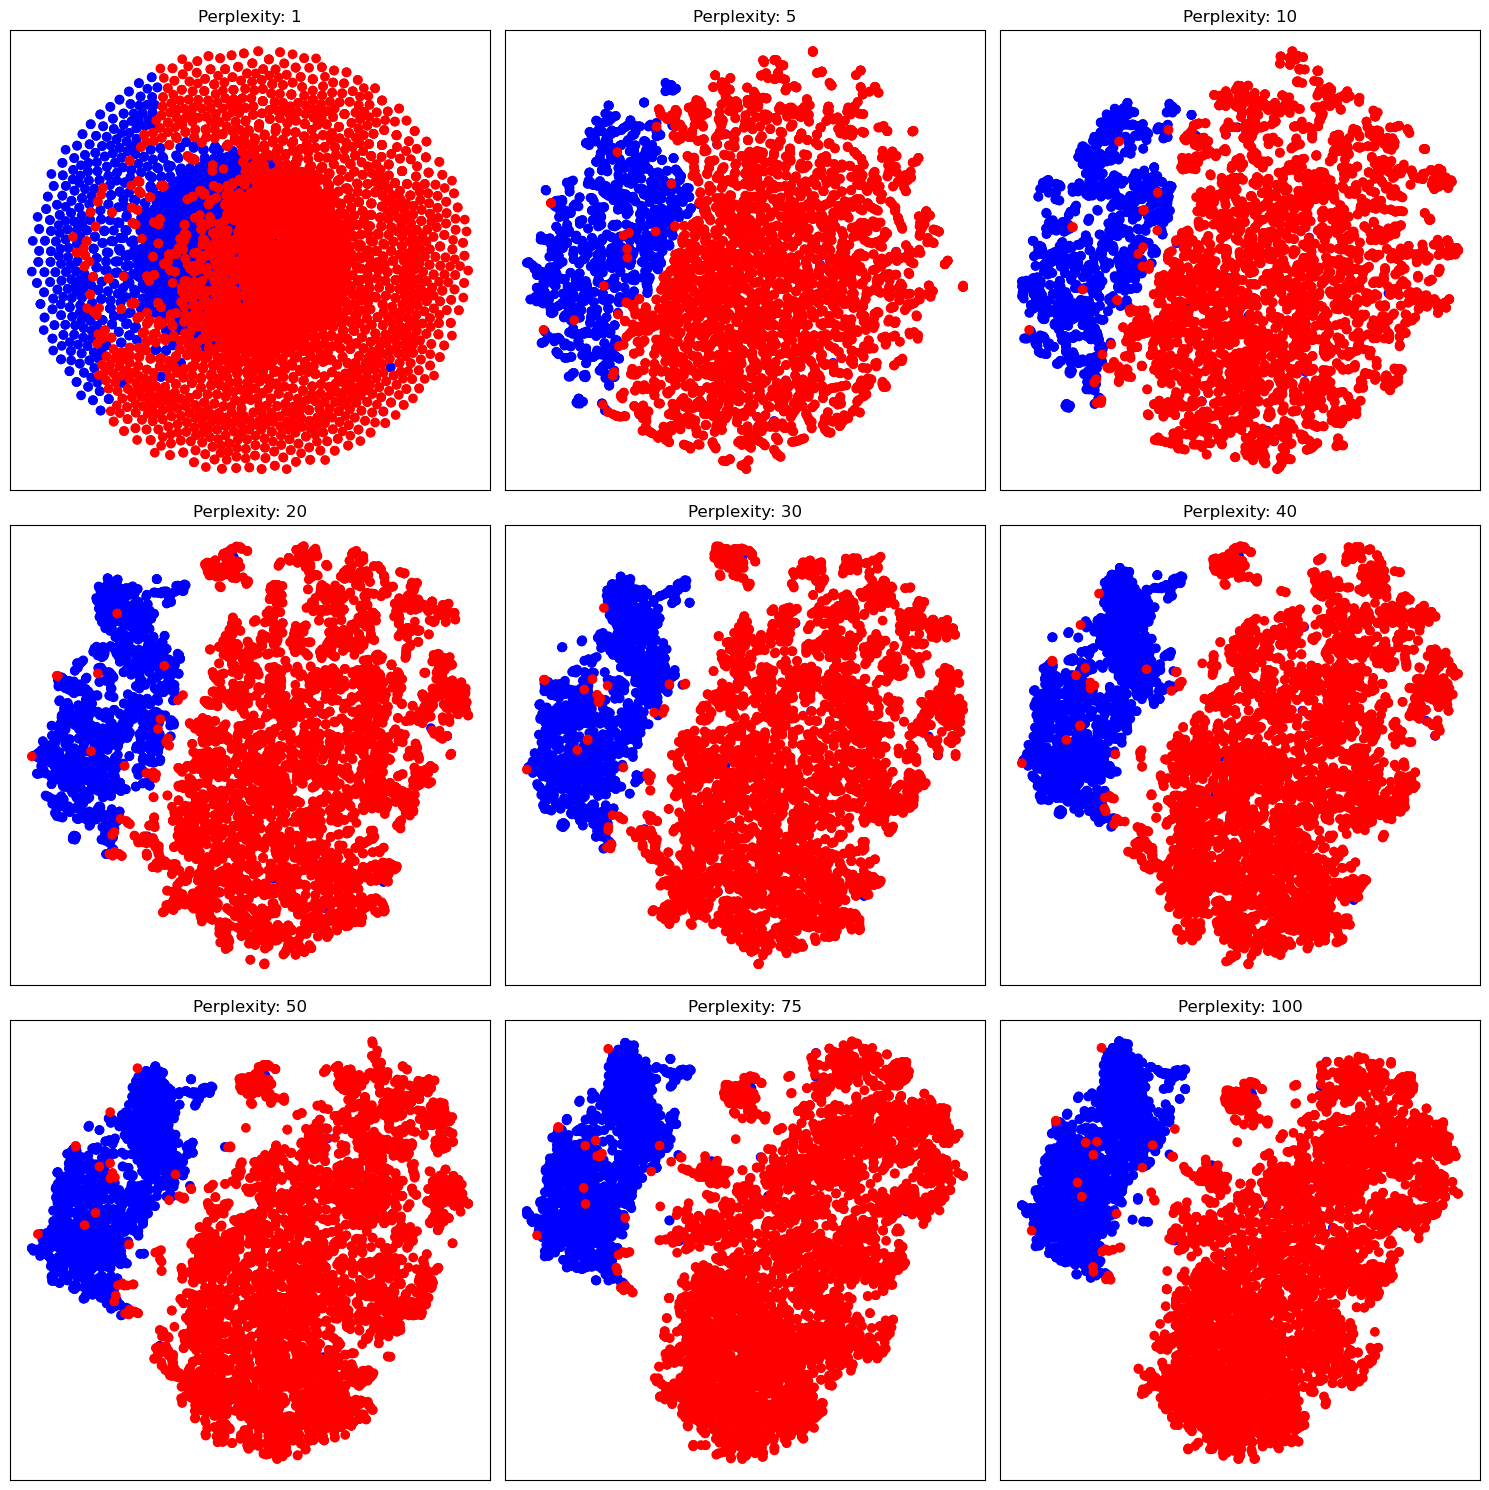

In [18]:
# Define perplexity values to use
perplexities = [1, 5, 10, 20, 30, 40, 50, 75, 100]

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Reshape axs to 1D array
axs = axs.flatten()

for i, perplexity in enumerate(perplexities):
    # Run t-SNE with the specified perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, learning_rate=200)
    tsne_results = tsne.fit_transform(df[vars_to_standardize])
    
    # Convert the t-SNE results to a pandas DataFrame
    tsne_df = pd.DataFrame(data=tsne_results, columns=['Dim1', 'Dim2'])

    # Add the quality categories to this DataFrame
    tsne_df['color'] = df['color'].values

    # Create a scatter plot in the corresponding subplot
    scatter = axs[i].scatter(tsne_df['Dim1'], tsne_df['Dim2'], c=tsne_df['color'].map({0: 'red', 1: 'blue'}))
    axs[i].set_title(f'Perplexity: {perplexity}')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

# Show the plot
plt.tight_layout()
plt.show()


*NB: This code takes a long time to run!* <br>By the time we get to perplexity = 20, we see that the pattern stabilizes. From 20 onwards, the shape stays relatively similar, and the stray color points do not move.

# Combined Cluster Model Results:

Overall, irrespective of the model quality is not easily distinguishable. The clustering models seem to easily distinguish color, but when it comes to quality I cannot find clear patterns or clusters where quality scores are grouped together. This was relatively surprising because I thought that there would be clear trends to what makes a good quality wine and what makes a bad quality wine. One possible reason that quality may not have been easily distinguished could be because wine quality may be extremely sensitive: if one chemical element is 'off' then the quality could be tanked. Quality is also a subjective measure, unlike the other factors.

Color was very easily distinguishable in every cluster model. K-means clustering seems to be the worst model, followed by kmeans++. These two models grouped the data into clusters, however, with ten different clusters, the models did not  distinguish between red and white wine as well as the other models. Of course, they still did a very good job, but in comparison they are slightly inferior. With that said, I would say that the interpretability of the basic clustering models are far better, and less complex for the average wine drinker to understand.

- The dimensionality reduction technique makes the most sense to me for this data is actually the tSNE because it is the most effective at visualizing complex, nonlinear relationships in the data. It has been especially good for highlighting local structures and groupings in terms of wine color. 

- While clustering helped in identifying natural groupings or clusters within a dataset, the groups that emerged were not the ones we wanted. 

- PCA is second to tSNE for this dataset, and was useful in reducing the number of features within this data set, while still preserving the variance. Moreover, it did provide us with a good visualization of the data for color split. Like the others, it failed to distinguish between qualities. Since PCAs focus was on reducing features, I have not chosen it to be the best one for this data. If anything, every chemical element in wine is important, and should be accounted for: using just PC1 and PC2 only caputes 50% of the variance.

